In [5]:
%pip install seaborn
#install seaborn for 1st time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# MOdels from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [7]:
df.shape

(297, 14)

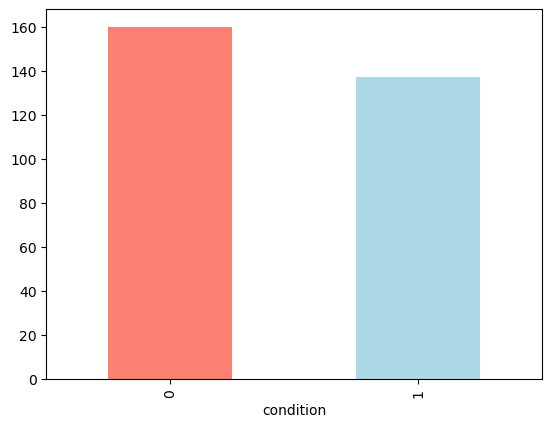

In [8]:
df["condition"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [10]:
# any missing values?
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [11]:
# compare target column with sex coloum
pd.crosstab(df.condition, df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


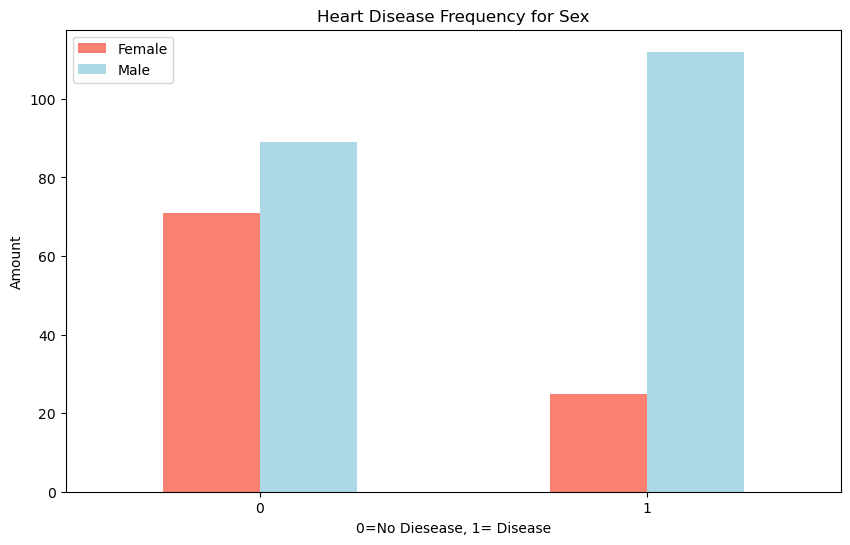

In [17]:
pd.crosstab(df.condition,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Diesease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

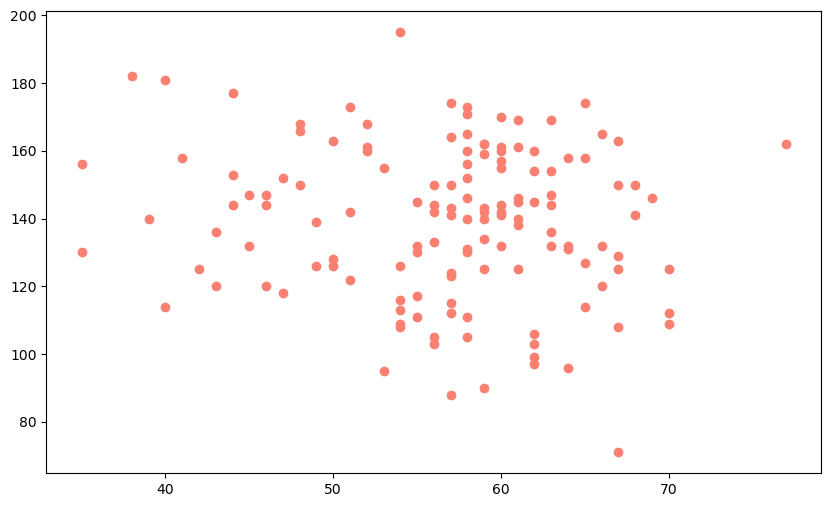

In [20]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with postivie example
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1],
            c="salmon")

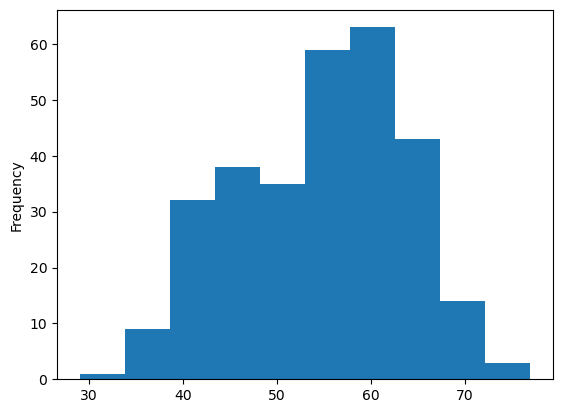

In [21]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

In [22]:
pd.crosstab(df.cp, df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


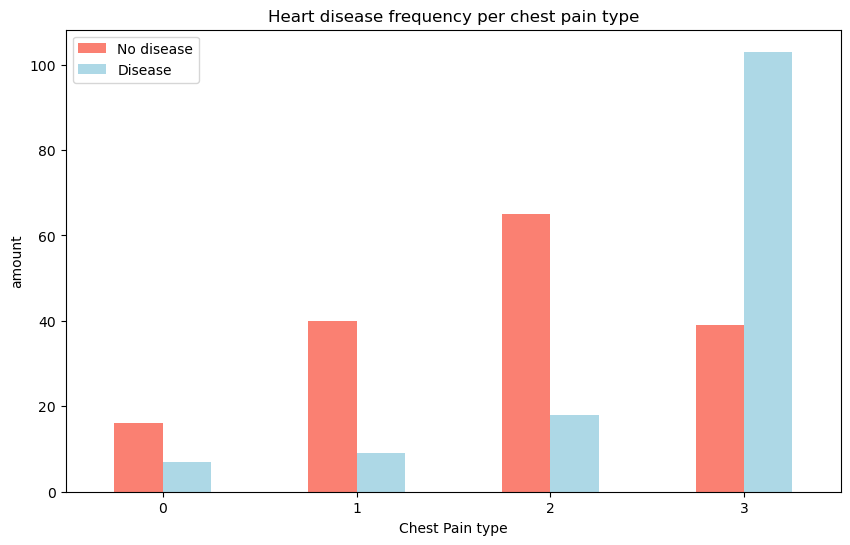

In [26]:
# make the crosstab more visual
pd.crosstab(df.cp, df.condition).plot(kind="bar",
                                      figsize=(10,6),
color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

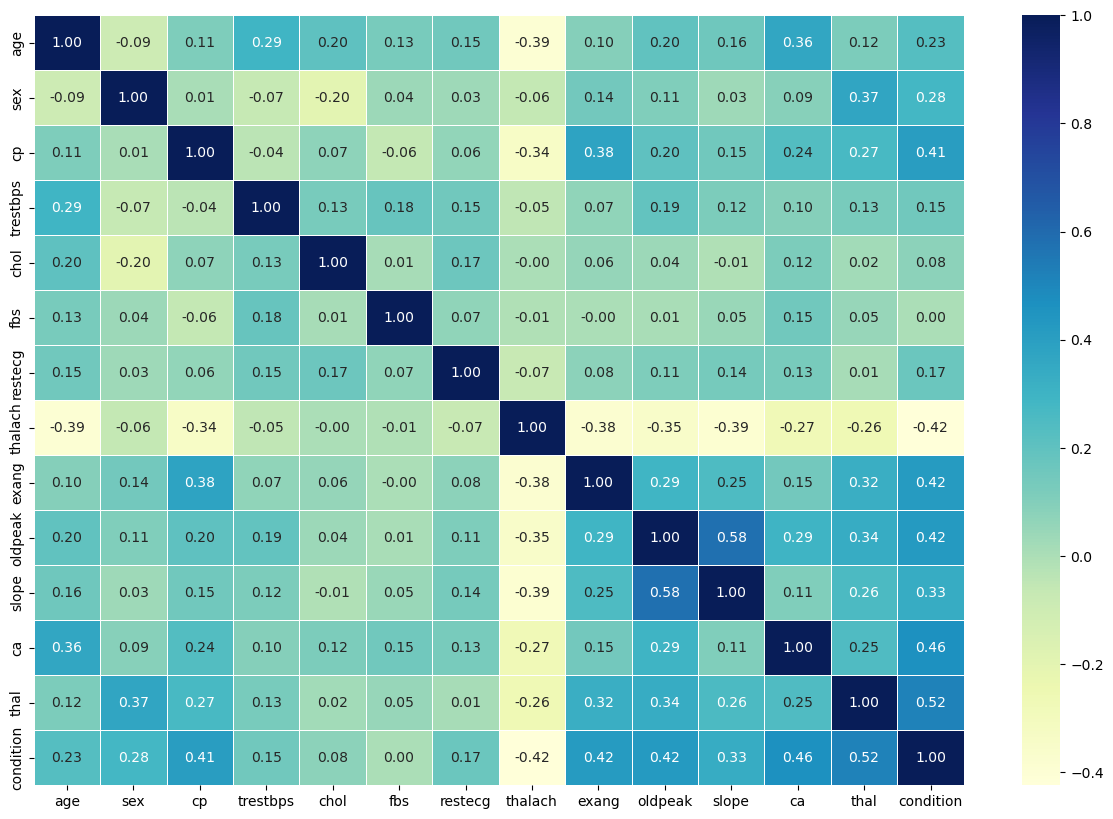

In [27]:
# let;s make the corrlation matrix better
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


In [29]:
# split data into X and y
X = df.drop("condition",axis=1)
y= df["condition"]

In [30]:
#split data into train and test sets
np.random.seed(40)

#split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# create a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machines learning models.
    models : a dict of different scikit-learn machine learning models
    """
    np.random.seed(40)

    # make a dic to keep model scores
    model_scores={}
    # loop through models
    for name, model in models.items():
       #fit the model to the data
       model.fit(X_train,y_train)
       #evaluate the model and append its score to model_scores
       model_scores[name]=model.score(X_test,y_test)
    return model_scores



In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Student\Desktop\ML\Udemy\first_assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8333333333333334, 'KNN': 0.6, 'Random Forest': 0.7}

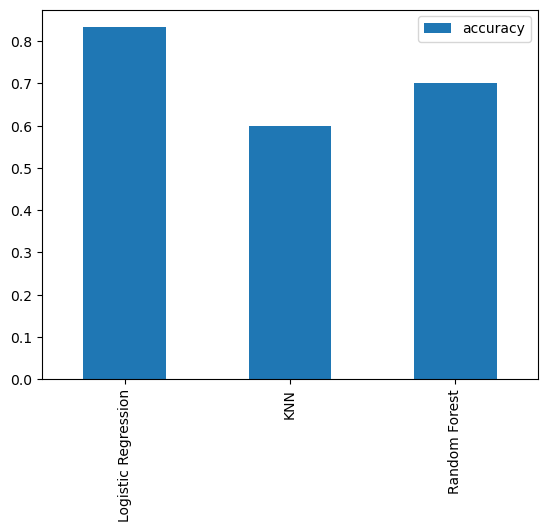

In [34]:
model_compare =pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

# let's look at the following
* hypyterparameter tuning
feature importance
confusion matrix
cross-valudation
precision
recall
f1 score
classification report
ROC curve
are under the curve

In [35]:
# start with KNN

In [37]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

#loop trhough different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algorithm
    knn.fit(X_train,y_train)

    # update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [38]:
train_scores

[1.0,
 0.8059071729957806,
 0.7805907172995781,
 0.7763713080168776,
 0.7805907172995781,
 0.7510548523206751,
 0.7890295358649789,
 0.7510548523206751,
 0.7552742616033755,
 0.7215189873417721,
 0.7426160337552743,
 0.7468354430379747,
 0.7383966244725738,
 0.7215189873417721,
 0.7426160337552743,
 0.7383966244725738,
 0.7341772151898734,
 0.7172995780590717,
 0.7341772151898734,
 0.7130801687763713]

In [39]:
test_scores

[0.5833333333333334,
 0.55,
 0.6,
 0.5833333333333334,
 0.6,
 0.5666666666666667,
 0.5666666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.5666666666666667,
 0.55,
 0.5333333333333333,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.6,
 0.6,
 0.6]

Max KNN score on the test data: 60.00%


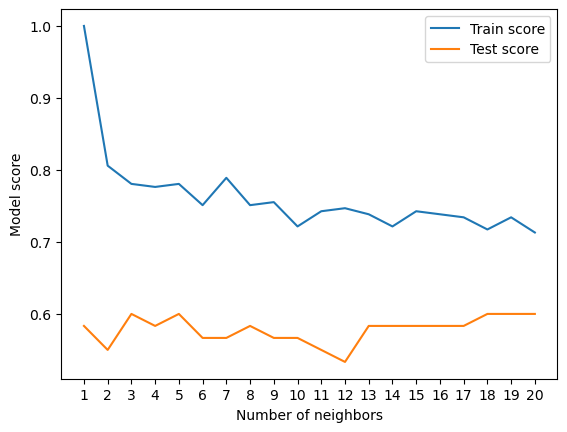

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

In [43]:
#creat a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# creat a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_lead":np.arange(1,20,2)}

In [44]:
# tune logisticRegression

np.random.seed(42)

# setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [46]:
rs_log_reg.score(X_test,y_test)

0.8

In [47]:
# different hyperparameters for our logisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [48]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [49]:
gs_log_reg.score(X_test,y_test)

0.8

## evaluting our tuned machine learning classifier, beyond accuracy
ROC curve and AUC score
confusuion matrix
classification report
precision
recall
f1-score

to make comparisons and evaluate our trained model, first we need to make predictions

In [50]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [51]:
y_preds

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = X_test
pred = gs_log_reg.predict(X_test)


In [62]:
y

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
43,54,1,1,108,309,0,0,156,0,0.0,0,0,2
166,66,1,3,120,302,0,2,151,0,0.4,1,0,0
18,45,1,0,110,264,0,0,132,0,1.2,1,0,2
103,57,1,2,128,229,0,2,150,0,0.4,1,1,2
252,53,1,3,123,282,0,0,95,1,2.0,1,2,2
125,50,0,2,120,219,0,0,158,0,1.6,1,0,0
231,57,0,3,120,354,0,0,163,1,0.6,0,0,0
120,51,1,2,110,175,0,0,123,0,0.6,0,0,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1
92,61,1,2,150,243,1,0,137,1,1.0,1,0,0


In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

ValueError: continuous-multioutput format is not supported

In [64]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1       0.88      0.72      0.79        32

    accuracy                           0.80        60
   macro avg       0.81      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



In [65]:
### calculate evaluation metrics using cross-validation

In [66]:
gs_log_reg.best_params_

{'C': 788.0462815669904, 'solver': 'liblinear'}

In [67]:
# create a new classifier with best parameters
clf = LogisticRegression(C=788,
                         solver="liblinear")

In [72]:
# cross-validated accuracy 
cv_acc= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

ValueError: Found input variables with inconsistent numbers of samples: [297, 60]

In [69]:
#cross-validated precision

In [70]:
# cross-validated recall

In [71]:
# cross-valudated f1-score